In [35]:
# [ケモインフォマティクスで多様な化合物ライブラリーを構築する | 化学の新しいカタチ](https://future-chem.com/diversified-library/)
# https://future-chem.com/diversified-library/

In [36]:
from rdkit import rdBase, Chem, DataStructs
from rdkit.Chem import AllChem, Draw
from rdkit.SimDivFilters.rdSimDivPickers import HierarchicalClusterPicker, ClusterMethod
import numpy as np



In [37]:
# below platinum dataset is got from 
# suppl = Chem.SDMolSupplier('./sdf/platinum_dataset_2017_01.sdf')

# I got below sample data from below URL (Japanese blog)
# [これであなたもデータサイエンティスト！？～Python入門のためのプログラミング課題と模範解答～(逐次更新)](https://datachemeng.com/pythonassignment/)
suppl = Chem.SDMolSupplier('./sdf/logSdataset1290_2d.sdf')

# you can down load ChEMBLab sdf data from below
# [ChEMBL Database](https://www.ebi.ac.uk/chembl/)
# [Index of /pub/databases/chembl/ChEMBLdb/latest/](ftp://ftp.ebi.ac.uk/pub/databases/chembl/ChEMBLdb/latest/)
# suppl = Chem.SDMolSupplier('./sdf/')


mols = [x for x in suppl if x is not None]


In [38]:
for prop in suppl[0].GetPropNames():
    print('{}: {}'.format(prop, mols[0].GetProp(prop)))
#     print(prop)
# print(len(mols))

CAS_Number: 60-35-5
logS: 1.58


In [39]:
print(len(mols))

1290


In [40]:
# PUBCHEM_COMPOUND_CID
# mols[0].GetProp("PUBCHEM_COMPOUND_CID")
mols[0].GetProp("CAS_Number")

'60-35-5'

In [41]:
# create finger print
morgan_fps = [AllChem.GetMorganFingerprintAsBitVect(m, 2, 2048) for m in mols]

In [44]:
# calculate distance matrix
dis_mat = []
for i in range(1, 1000):
    dis_mat.extend(DataStructs.BulkTanimotoSimilarity(morgan_fps[i], morgan_fps[:i], returnDistance=True))

### create  HierarchicalClusterPicker instance
ward = HierarchicalClusterPicker(ClusterMethod.WARD)
ids = ward.Pick(np.array(dis_mat), 1000, 6)
list(ids)

[492, 785, 715, 554, 366, 874]

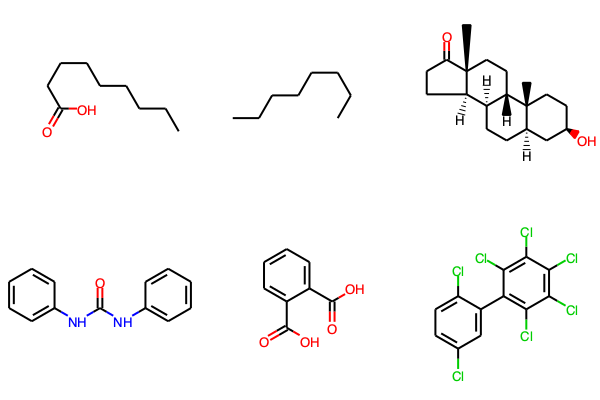

In [71]:
# molsList = list([mols[ids[0]],mols[ids[1]],mols[ids[2]],mols[ids[3]],mols[ids[4]], mols[ids[5]]])
molsList = []

for i in ids:
    molsList.append(mols[i])

Draw.MolsToGridImage(molsList)